# Q1. Reading the Rounds2, companies.txt files.

In [2]:
import pandas as pd

df = pd.read_csv('rounds2.csv', encoding='latin1')
df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [3]:
df1 = pd.read_csv('companies (1).txt', sep='\t')
df1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


# Q2. How many unique companies are present in rounds2?



In [4]:
len(df["company_permalink"].unique())

90247

# 3. How many unique companies are present in the companies file?


In [5]:
df1.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [6]:
df.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [7]:
df1["permalink"].nunique()

66368

# 4. Are there any companies in the rounds2 file which are not present in companies ?

In [8]:
s1=df["company_permalink"].str.lower()
s2=df1["permalink"].str.lower()
len(set(s1).difference(set(s2)))

29

# 5. Merge the two data frames so that all variables (columns) in the company's frame are added to the rounds2 data frame. Name the merged frame master_dataframe. How many observations are present in master_frame ?

In [9]:
df['permalink'] = df['company_permalink'].str.lower()
df1['permalink'] = df1['permalink'].str.lower()

master_dataframe = pd.merge(df, df1, on='permalink', how='left')
master_dataframe.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In the newly created master_dataframe, there are 114949 rows and 16 columns.

# 6. Write the code to drop the redundant column ‘'company_permalink' from the master_dataframe.

In [10]:
master_dataframe.drop(columns="company_permalink",inplace=True,axis=1)

In [11]:
master_dataframe

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ãasys-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see company_permalink column has been dropped from the dataframe.

# 7. Write the code to find the percentage missing value (column-wise) in master_dataframe. Drop unnecessary columns.

In [12]:
total = master_dataframe.isnull().sum().sort_values(ascending=False)
per=(master_dataframe.isnull().sum()/(len(master_dataframe))*100)
per=per.sort_values(ascending=False)
missing_data = pd.concat([total, per], axis=1, keys=['Total', 'Percent'])
missing_data['Type'] = master_dataframe[missing_data.index].dtypes
missing_data

,Total,Percent,Type
funding_round_code,83809,72.909725,object
founded_at,20542,17.870534,object
raised_amount_usd,19990,17.390321,float64
state_code,10953,9.528574,object
region,10175,8.851752,object
city,10172,8.849142,object
country_code,8686,7.556395,object
homepage_url,6161,5.359768,object
category_list,3431,2.984802,object
name,33,0.028708,object


Columns are sorted by according to total missing values they have in a descending order - total count of missing values, percentage of missing values and also the datatype of each column is shown above.

In [13]:
master_dataframe.drop(['funding_round_code', 'funding_round_permalink', 'permalink', 'homepage_url',\
                       ], axis=1, inplace=True)

master_dataframe.head()

,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,founded_at
0,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


Dropping funding_round_code column from the master_dataframe as it contains 73% of missing data points.
Dropping funding_roung_permalink and permalink columns as they are unique identifiers.
Also, Dropping homepage_url column as it is not useful.

# 8. Create a pivot table to compare the mean and median values for ‘raised_amount_usd’ and ‘funding_round_type’ across different funding round categories..

In [14]:
pd.pivot_table(df,index="funding_round_type",values="raised_amount_usd",aggfunc=["mean","median"])


,mean,median
,raised_amount_usd,raised_amount_usd
funding_round_type,,
angel,9.586945e+05,400000.0
convertible_note,1.453439e+06,272000.0
debt_financing,1.704353e+07,1100000.0
equity_crowdfunding,5.383682e+05,100000.0
grant,4.300576e+06,201684.0
non_equity_assistance,4.112031e+05,60000.0
post_ipo_debt,1.687046e+08,19950000.0
post_ipo_equity,8.218249e+07,12262852.5


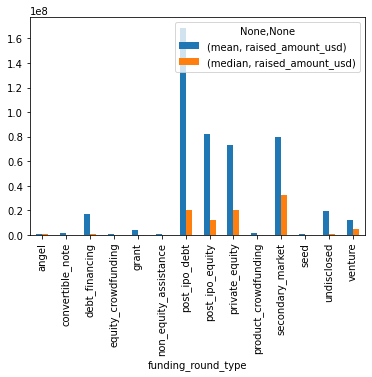

In [15]:
import matplotlib.pyplot as plt
d2=pd.pivot_table(df,index="funding_round_type",values="raised_amount_usd",aggfunc=["mean","median"])
d2.plot(kind="bar")
plt.show()

In [16]:
-- we can see that post_ipo_debt has maximum mean and secondary market has the highest median

SyntaxError: invalid syntax (2661222091.py, line 1)

# 9 Filter the master_dataframe on ‘raised_amount_usd’ such as ‘raised_amount_usd’ lie between 4 Millions to 15 Millions.


In [ ]:
master_dataframe[(master_dataframe["raised_amount_usd"]>4000000) & (master_dataframe["raised_amount_usd"]<15000000)]

The filtered dataset based on the asked condition has 19769 rows and 9 columns.

# 10.Identify the top 9 countries in terms of highest investment in ‘venture’ fund type.

In [ ]:
pd.options.display.float_format = '{:.3f}'.format
dv=master_dataframe[master_dataframe["funding_round_type"]=="venture"].groupby(by="country_code").sum().sort_values(by="raised_amount_usd",ascending=False).head(9)

In [ ]:
dv

In [18]:
dv=master_dataframe[master_dataframe["funding_round_type"]=="venture"].groupby(by="country_code").sum().sort_values(by="raised_amount_usd",ascending=False).head(9)
dv

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


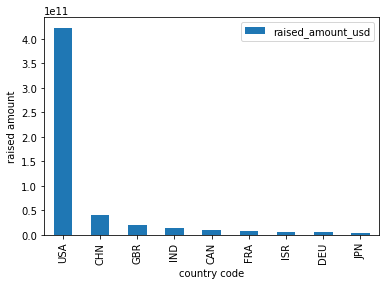

In [19]:
dv.plot(kind="bar")
plt.xlabel("country code")
plt.ylabel("raised amount")
plt.show()


In [20]:
## we can see here that USA has the highest raised amount

# 11. Create the ‘main_category’ column by extracting the main sector using the column ‘category_list’.Hint - Use the Lambda function or string function.

In [27]:
master_frame_1=master_dataframe
master_frame_1['main_category']=master_frame_1.apply(lambda add_new_column:add_new_column.category_list,axis=1)
master_frame_1.head(2)

,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,state_code,region,city,founded_at,main_category
0,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms|Real Time|Social Network...


# 12. Using the user defined function convert the ‘rasied_amount_used’ column as Type_A for amount less than 5 millions,TypeB for the amount 5Mn to 7Mn, TypeC for the amount 7Mn to 15 Mn

In [24]:
def convert(x):
    if x<=5000000:
        return "Type_A"
    elif x>=5000000 and x<7000000:
        return "Type_B"
    elif x>=7000000 and x<15000000:
        return "Type_C"
    else:
        return
    
    

In [25]:
master_dataframe.raised_amount_usd.map(convert).value_counts()

Type_A    66456
Type_C    11319
Type_B     4276
Name: raised_amount_usd, dtype: int64

As we can see from above, the raised_amount_usd is divided into three categories. Type A is between 0 and 5 million USD where they contain 66041 values, Type B is between 5 million and 7 million USD where they contain 5110 values and Type C is between 7 million and 15 million USD where they contain 11681 values.